In [49]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
import os

In [50]:
import pathlib

In [51]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [52]:
data_dir = tf.keras.utils.get_file('flower_photos', origin =dataset_url, cache_dir = '.', untar = True )

In [53]:
data_dir

'.\\datasets\\flower_photos'

In [54]:
data_path = pathlib.Path(data_dir)

In [55]:
data_path

WindowsPath('datasets/flower_photos')

In [56]:
list(data_path.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [57]:
len(list(data_path.glob('*/*.jpg')))

3670

In [58]:
roses = list(data_path.glob('roses/*.jpg'))

In [59]:
roses[0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

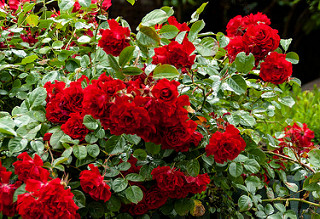

In [62]:
PIL.Image.open(roses[14])

In [68]:
flowers_names = {'roses' : 0, 'daisy' : 1, 'dandelion' : 2, 'sunflowers' : 3, 'tulips': 4}

In [69]:
flowers_names['daisy']

1

In [70]:
flowers_images_dict = {'roses' : list(data_path.glob('roses/*')),
                      'daisy' : list(data_path.glob('daisy/*')),
                      'dandelion' : list(data_path.glob('dandelion/*')),
                      'sunflowers' : list(data_path.glob('sunflowers/*')),
                      'tulips': list(data_path.glob('tulips/*'))
}

In [71]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [72]:
for i in flowers_images_dict:
    print(i, ":", flowers_images_dict[i])

roses : [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flower_photos/roses

In [73]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [74]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [75]:
img.shape

(240, 179, 3)

In [76]:
img = cv2.imread(str(flowers_images_dict['roses'][11]))

In [77]:
img.shape

(256, 320, 3)

In [78]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [64]:
d  = {'a': 1, 'b':2}
d.items()

dict_items([('a', 1), ('b', 2)])

In [79]:
X, y = [], []
for flower_name, images in  flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img, (180, 180))
        X.append(resized)
        y.append(flowers_names[flower_name])
        

In [81]:
X[120].shape

(180, 180, 3)

In [85]:
X = np.array(X)
y = np.array(y)

In [26]:
X = X/255

In [27]:
X

array([[[[0.00392157, 0.0627451 , 0.02745098],
         [0.00392157, 0.0627451 , 0.02745098],
         [0.00392157, 0.06666667, 0.03529412],
         ...,
         [0.09019608, 0.19607843, 0.12156863],
         [0.09803922, 0.2       , 0.1254902 ],
         [0.10196078, 0.20392157, 0.12941176]],

        [[0.03921569, 0.09019608, 0.05882353],
         [0.03921569, 0.09019608, 0.05882353],
         [0.03529412, 0.08627451, 0.05490196],
         ...,
         [0.07843137, 0.17254902, 0.11764706],
         [0.09019608, 0.18431373, 0.12941176],
         [0.10196078, 0.19607843, 0.14117647]],

        [[0.05098039, 0.07843137, 0.05098039],
         [0.04705882, 0.07843137, 0.05098039],
         [0.04313725, 0.0745098 , 0.04705882],
         ...,
         [0.08235294, 0.16862745, 0.11764706],
         [0.08627451, 0.17647059, 0.12156863],
         [0.09803922, 0.18823529, 0.13333333]],

        ...,

        [[0.04705882, 0.09411765, 0.07058824],
         [0.04313725, 0.08627451, 0.05882353]

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [88]:
X_train.shape

(2936, 180, 180, 3)

In [89]:
X_test.shape

(734, 180, 180, 3)

In [90]:
X_train = X_train/255

In [91]:
cnn = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding = "same", activation = 'relu', input_shape = (180,180,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid')
])

In [92]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [93]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 95s 1s/step - loss: 1.3556 - Accuracy: 0.4189
Epoch 2/5
92/92 [==============================] - 135s 1s/step - loss: 0.9673 - Accuracy: 0.6270
Epoch 3/5
92/92 [==============================] - 219s 2s/step - loss: 0.7791 - Accuracy: 0.7095
Epoch 4/5
92/92 [==============================] - 140s 2s/step - loss: 0.5526 - Accuracy: 0.8018
Epoch 5/5
92/92 [==============================] - 105s 1s/step - loss: 0.3384 - Accuracy: 0.8852


In [94]:
cnn.evaluate(X_test, y_test)

23/23 [==============================] - 8s 348ms/step - loss: 269.0983 - Accuracy: 0.5518


[269.0982666015625, 0.5517711043357849]

In [36]:
import matplotlib.pyplot as plt

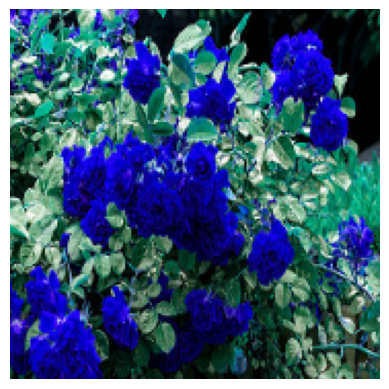

In [113]:
plt.axis('off')
plt.imshow(X[14])
plt.show()

In [114]:
data_augmentation = keras.layers.experimental.preprocessing.RandomZoom(0.5)

In [115]:
data_augmentation

In [116]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 9.968041  , 21.934988  , 11.934989  ],
        [ 9.013829  , 22.85652   , 11.933897  ],
        [ 8.875838  , 22.87584   , 11.875837  ],
        ...,
        [25.        , 50.        , 35.150734  ],
        [25.067148  , 49.912395  , 35.91495   ],
        [25.798414  , 48.79732   , 34.830376  ]],

       [[11.875743  , 25.720993  , 14.7983675 ],
        [10.922625  , 24.91065   , 13.916637  ],
        [10.034906  , 24.034906  , 13.034906  ],
        ...,
        [19.351965  , 45.27459   , 29.361382  ],
        [18.833176  , 44.529655  , 28.755796  ],
        [22.365372  , 45.365376  , 30.442749  ]],

       [[17.186743  , 31.186745  , 19.308443  ],
        [14.7265    , 30.347185  , 18.468884  ],
        [12.863491  , 29.391508  , 16.741793  ],
        ...,
        [23.93432   , 49.269806  , 34.705727  ],
        [21.34699   , 48.12908   , 31.328157  ],
        [19.344112  , 44.979015  , 29.042658  ]],

       ...,

     

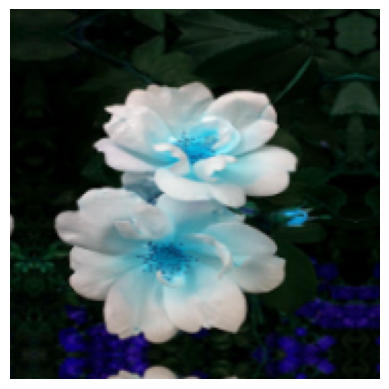

In [117]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

In [102]:
data_augmentation = keras.layers.experimental.preprocessing.RandomRotation(0.5)

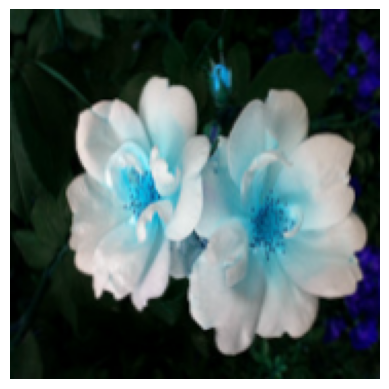

In [103]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

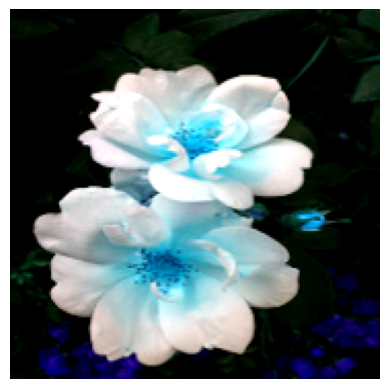

In [118]:
data_augmentation = keras.layers.experimental.preprocessing.RandomContrast(0.5)
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

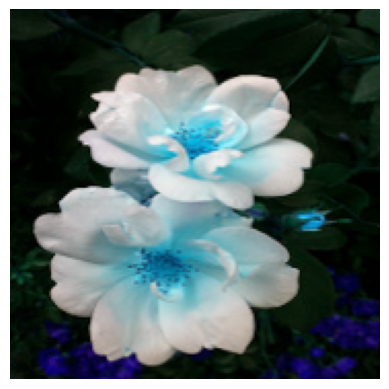

In [119]:
data_augmentation = keras.layers.experimental.preprocessing.RandomFlip('horizontal')
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

In [120]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)  
])

In [121]:
cnn = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid')
])

In [122]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [123]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 131s 1s/step - loss: 1.4296 - Accuracy: 0.3856
Epoch 2/5
92/92 [==============================] - 123s 1s/step - loss: 1.0751 - Accuracy: 0.5623
Epoch 3/5
92/92 [==============================] - 113s 1s/step - loss: 0.9499 - Accuracy: 0.6253
Epoch 4/5
92/92 [==============================] - 107s 1s/step - loss: 0.8764 - Accuracy: 0.6533
Epoch 5/5
92/92 [==============================] - 100s 1s/step - loss: 0.8266 - Accuracy: 0.6815


In [124]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 29s 311ms/step - loss: 0.7708 - Accuracy: 0.7061
Epoch 2/10
92/92 [==============================] - 35s 378ms/step - loss: 0.7444 - Accuracy: 0.7166
Epoch 3/10
92/92 [==============================] - 47s 516ms/step - loss: 0.7122 - Accuracy: 0.7323
Epoch 4/10
92/92 [==============================] - 54s 583ms/step - loss: 0.6648 - Accuracy: 0.7456
Epoch 5/10
92/92 [==============================] - 59s 642ms/step - loss: 0.6474 - Accuracy: 0.7517
Epoch 6/10
92/92 [==============================] - 65s 704ms/step - loss: 0.6170 - Accuracy: 0.7667
Epoch 7/10
92/92 [==============================] - 57s 620ms/step - loss: 0.5938 - Accuracy: 0.7738
Epoch 8/10
92/92 [==============================] - 55s 597ms/step - loss: 0.5653 - Accuracy: 0.7766
Epoch 9/10
92/92 [==============================] - 47s 508ms/step - loss: 0.5483 - Accuracy: 0.7899
Epoch 10/10
92/92 [==============================] - 58s 627ms/step - loss: 0.5148 - Accura